**Importing necessary files/Modules**


In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import spacy
nltk.download('wordnet')
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix




[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df_emoji = pd.read_csv("mapping.csv")
df_emoji


,Label,Emojis,Description
0,0,❤️,Red heart\t
1,1,😍,Smiling face with hearteyes\t
2,2,😂,Face with tears of joy\t
3,3,💕,Two hearts
4,4,🔥,Fire
5,5,😊,Smiling face with smiling eyes\t
6,6,😎,Smiling face with sunglasses\t
7,7,✨,Sparkles \t
8,8,💙,Blue heart
9,9,😘,Face blowing a kiss\t


**Emojies We are Working on** and their labels

**Dataset**

In [ ]:
df = pd.read_csv("train.csv")
df.head(5)

,Tweet,Label
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2


In [ ]:
df.columns

Index(['Tweet', 'Label'], dtype='object')

In [ ]:
# Some sample tweet
print("Tweet : ", df['Tweet'][0])
print("Tweet : ", df['Tweet'][3])
print("Tweet : ", df['Tweet'][102])
print("Tweet : ", df['Tweet'][20000])
print("Tweet : ", df['Tweet'][49999])

Tweet :  A little throwback with my favourite person @ Water Wall
Tweet :  Then &amp; Now. VILO @ Walt Disney Magic Kingdom
Tweet :  It's the most wonderful time of the year -#rockefellercenter #christmas #christmastree…
Tweet :  Marie captured My Sweet Senna Boy perfectly. Miss you everyday…
Tweet :  Dinner with this priceless view!Thank you, S #anniversarydinner #columbuscircle #august23rd…


We can clearly see that almost all the tweets contain unnecessary keywords (like: @, #, numbers, punctuations, retweets). So we should get rid of this things. Otherwise our models might not perform up to the mark. We will clean these and will use regular expressions.


**Data Cleaning**

In [ ]:
import string
import re

def tweet_clean(tweet):
    tweet = str(tweet).lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)
    # Remove @mentions
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
    # Remove numbers
    tweet = re.sub(r'[0-9]+', '', tweet)
    # Remove ReTweets
    tweet = re.sub(r'RT\s+', '', tweet)
    # Remove punctuations
    tweet = ''.join(char for char in tweet if char not in string.punctuation)
    # Strip leading/trailing whitespace
    cleaned = tweet.strip()

    return cleaned


In [ ]:
df["Tweet"] = df["Tweet"].apply(tweet_clean)
df.head(5)


,Tweet,Label
0,a little throwback with my favourite person w...,0
1,glam on yesterday for kcon makeup using in f...,7
2,democracy plaza in the wake of a stunning outc...,11
3,then amp now vilo walt disney magic kingdom,0
4,who never a galaxy far far away,2


In [ ]:
#Looking at the same examples

print("Tweet : ", df['Tweet'][0])
print("Tweet : ", df['Tweet'][3])
print("Tweet : ", df['Tweet'][102])
print("Tweet : ", df['Tweet'][20000])
print("Tweet : ", df['Tweet'][49999])

Tweet :  a little throwback with my favourite person  water wall
Tweet :  then amp now vilo  walt disney magic kingdom
Tweet :  its the most wonderful time of the year rockefellercenter christmas christmastree…
Tweet :  marie captured my sweet senna boy perfectly miss you everyday…
Tweet :  dinner with this priceless viewthank you s anniversarydinner columbuscircle augustrd…


**Data Analysis and Visualization**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   50000 non-null  object
 1   Label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [ ]:
num_tweets = len(df)
num_unique_emojis = df['Label'].nunique()

emoji_counts = df['Label'].value_counts()

print("Data Summary:")
print("Number of Tweets:", num_tweets)
print("Number of Unique Emojis:", num_unique_emojis)
print("Emoji Counts:")
print(emoji_counts)

Data Summary:
Number of Tweets: 50000
Number of Unique Emojis: 20
Emoji Counts:
0     10760
1      5279
2      5241
3      2885
4      2517
5      2317
6      2049
7      1894
8      1796
9      1671
10     1544
11     1528
12     1462
14     1377
13     1346
16     1306
18     1286
17     1279
15     1249
19     1214
Name: Label, dtype: int64


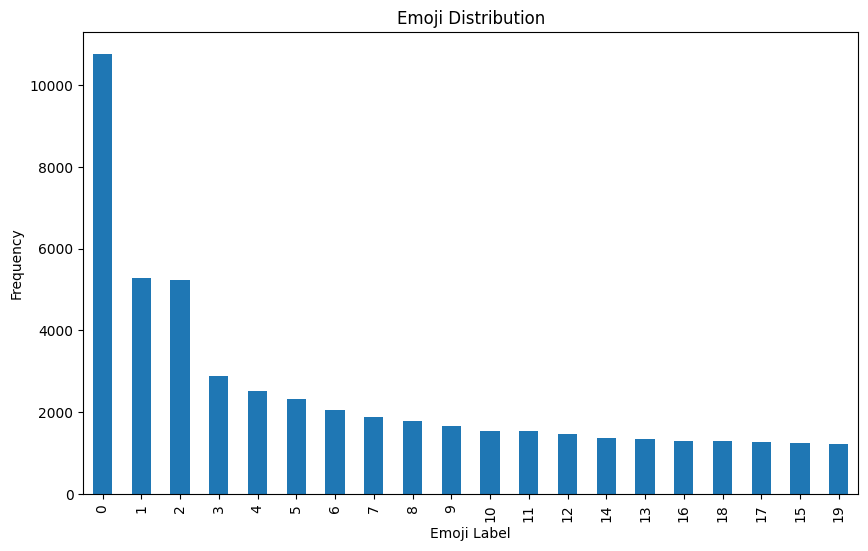

In [ ]:

emoji_counts = df['Label'].value_counts()

plt.figure(figsize=(10, 6))
emoji_counts.plot(kind='bar')
plt.xlabel('Emoji Label')
plt.ylabel('Frequency')
plt.title('Emoji Distribution')
plt.show()

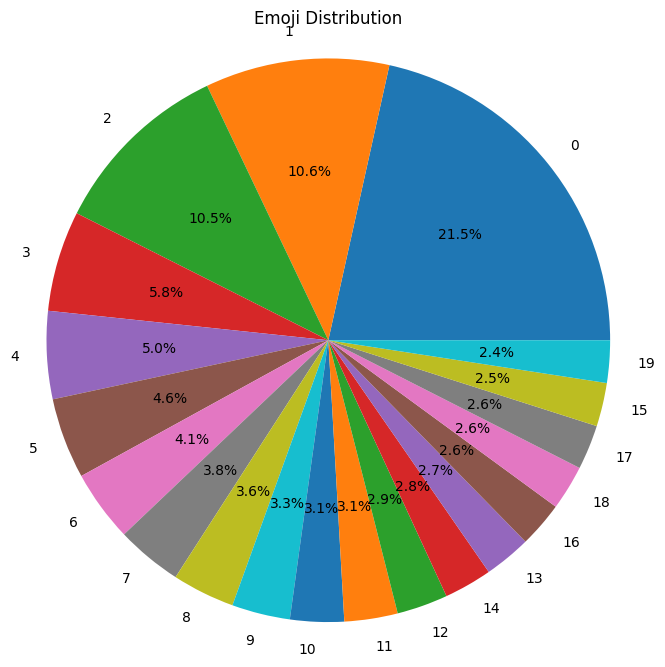

In [ ]:

plt.figure(figsize=(8, 8))
plt.pie(emoji_counts, labels=emoji_counts.index, autopct='%1.1f%%')
plt.title('Emoji Distribution')
plt.axis('equal')
plt.show()

**Data Pre-Processing**

In [ ]:

# nlp = spacy.load("en_core_web_sm")
# def tokenize_text(text):
#     doc = nlp(text)
#     tokens = [token.text for token in doc]
#     return tokens

# df['tokens'] = df['Tweet'].apply(tokenize_text)
# df

In [ ]:

# lemmatizer = WordNetLemmatizer()

# def tokenize_and_lemmatize(text):
#     doc = nlp(text)
#     lemmas = [lemmatizer.lemmatize(token.text) for token in doc]
#     return lemmas

# df['lemmas'] = df['Tweet'].apply(tokenize_and_lemmatize)
# df

**Data Pre-Processing** Combining in one function

In [ ]:

nlp = spacy.load("en_core_web_sm")
lemmatizer = WordNetLemmatizer()

def tweet_preprocessing(tweet, nlp=nlp, lemmatizer=lemmatizer):

    stop_words = nlp.Defaults.stop_words
    processed_words = []

    doc = nlp(tweet)
    for token in doc:
        if token.text not in stop_words and token.pos_!="PUNCT":
            lemma_word = lemmatizer.lemmatize(token.text)
            processed_words.append(lemma_word)

    processed = " ".join(processed_words)
    return processed

In [ ]:
df["Tweet"] = df["Tweet"].apply(tweet_preprocessing)

In [ ]:
#Looking at the same examples (after pre-processing)

print("Tweet : ", df['Tweet'][0])
print("Tweet : ", df['Tweet'][3])
print("Tweet : ", df['Tweet'][102])
print("Tweet : ", df['Tweet'][20000])
print("Tweet : ", df['Tweet'][49999])

Tweet :  little throwback favourite person   water wall
Tweet :  amp vilo   walt disney magic kingdom
Tweet :  wonderful time year rockefellercenter christmas christmastree
Tweet :  marie captured sweet senna boy perfectly miss everyday
Tweet :  dinner priceless viewthank s anniversarydinner columbuscircle augustrd


In [ ]:
# df = df.drop(['tokens','lemmas'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   50000 non-null  object
 1   Label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [ ]:
df.head(5)

,Tweet,Label
0,little throwback favourite person water wall,0
1,glam yesterday kcon makeup featherette,7
2,democracy plaza wake stunning outcome decision...,11
3,amp vilo walt disney magic kingdom,0
4,galaxy far far away,2


**Vectorizer**

In [ ]:
vectorizer = CountVectorizer()
count_vector = vectorizer.fit_transform(df['Tweet'])
features = vectorizer.get_feature_names_out()
features

array(['aa', 'aaa', 'aaaaahhhh', ..., 'ｓｎａｐｃｈａｔｆｉｌｔｅｒｓ', 'ｗｉｔｈ',
       'ｗｏｎｄｅｒｆｕｌ'], dtype=object)

In [ ]:
df_mini = df.iloc[:10]

c_vect = CountVectorizer()
X_mini = c_vect.fit_transform(df_mini["Tweet"])

x = X_mini.toarray()
count_vec = pd.DataFrame(x)
count_vec.columns = c_vect.get_feature_names_out()

count_vec.head(10)

,amp,away,beating,best,birthday,cause,congrats,couscous,cousinlove,decision,...,veggie,vilo,wake,wall,walt,water,west,wisconsin,yesterday,yum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
6,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X=count_vector

In [ ]:
X

<50000x54379 sparse matrix of type '<class 'numpy.int64'>'
	with 312411 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split

y = df["Label"].values
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=53)

In [ ]:
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

Training X Dim  (40000, 54379)
Training y Dim  (40000,)


In [ ]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:

y_pred = NB_classifier.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
cm

array([[1848,  126,   99,   11,    9,    5,    3,    6,    0,    1,    1,
           3,    8,    1,    1,    2,    0,    9,    0,    1],
       [ 805,  138,   83,    3,    7,    7,    1,    2,    2,    2,    0,
           2,    1,    0,    0,    0,    0,    1,    1,    0],
       [ 510,   53,  430,    3,   11,    2,    2,    4,    1,    0,    2,
           8,    2,    1,    0,    0,    0,    1,    1,    0],
       [ 484,   34,   36,    5,    3,    0,    1,    0,    0,    0,    0,
           0,    2,    0,    0,    0,    1,    3,    0,    0],
       [ 318,   41,   59,    3,  117,    0,    3,    1,    0,    0,    0,
           0,    0,    0,    1,    0,    0,    1,    0,    0],
       [ 369,   35,   46,    0,    0,    1,    1,    1,    0,    0,    2,
           2,    1,    0,    0,    0,    1,    0,    0,    0],
       [ 308,   21,   46,    4,   13,    2,    7,    1,    1,    0,    1,
           1,    3,    0,    1,    0,    0,    1,    0,    0],
       [ 293,   32,   31,    1,    5,    

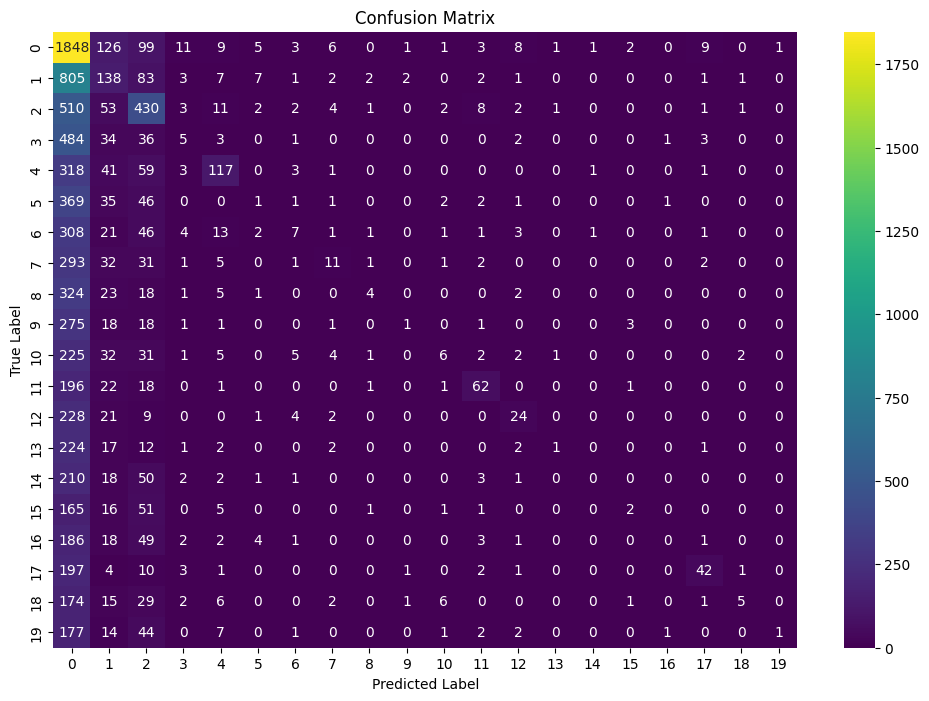

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='viridis', ax=ax)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.87      0.38      2134
           1       0.20      0.13      0.16      1055
           2       0.37      0.42      0.39      1031
           3       0.12      0.01      0.02       569
           4       0.58      0.22      0.31       544
           5       0.04      0.00      0.00       459
           6       0.23      0.02      0.03       410
           7       0.30      0.03      0.05       380
           8       0.33      0.01      0.02       378
           9       0.17      0.00      0.01       319
          10       0.27      0.02      0.04       317
          11       0.66      0.21      0.31       302
          12       0.46      0.08      0.14       289
          13       0.25      0.00      0.01       262
          14       0.00      0.00      0.00       288
          15       0.22      0.01      0.02       242
          16       0.00      0.00      0.00       267
          17       0.67    

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)


[[1861   55  110    0   10    0    2    7    3    2    2   16   27    1
     0    0    0   38    0    0]
 [ 826   92   84    0    7    0    2    6    4    0    0    8   18    0
     0    0    0    8    0    0]
 [ 555   23  410    0   10    0    0    1    1    0    0    8   12    0
     0    0    0   10    1    0]
 [ 495   14   30    4    4    0    1    2    0    0    0    4    9    0
     0    0    0    6    0    0]
 [ 328   11   45    0  147    0    0    1    0    0    1    4    3    0
     0    0    0    3    1    0]
 [ 374   14   46    0    0    0    4    1    0    0    0    5    9    0
     0    0    0    6    0    0]
 [ 319    9   43    1    9    0    6    3    1    1    0    1   14    0
     0    0    0    3    0    0]
 [ 293   13   26    0    6    0    1   26    2    0    1    1    3    0
     0    0    0    7    1    0]
 [ 321    9   17    0    3    0    0    5    8    1    0    2   10    0
     0    0    0    2    0    0]
 [ 272    8   24    0    0    0    0    0    0    5    

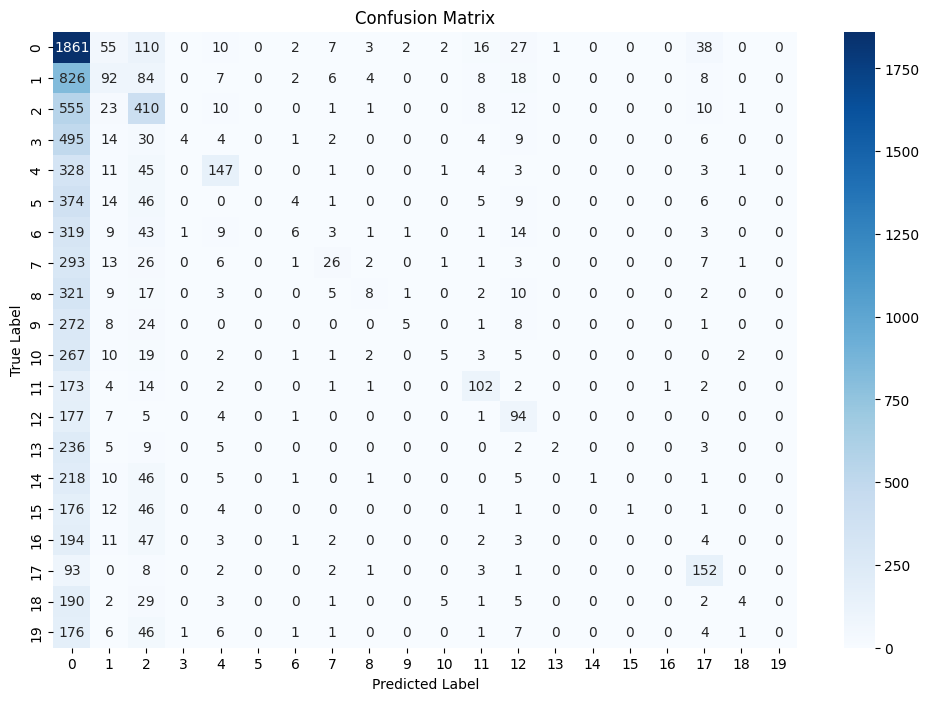

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.87      0.38      2134
           1       0.29      0.09      0.13      1055
           2       0.37      0.40      0.38      1031
           3       0.67      0.01      0.01       569
           4       0.63      0.27      0.38       544
           5       0.00      0.00      0.00       459
           6       0.29      0.01      0.03       410
           7       0.43      0.07      0.12       380
           8       0.33      0.02      0.04       378
           9       0.56      0.02      0.03       319
          10       0.36      0.02      0.03       317
          11       0.62      0.34      0.44       302
          12       0.39      0.33      0.36       289
          13       0.67      0.01      0.02       262
          14       1.00      0.00      0.01       288
          15       1.00      0.00      0.01       242
          16       0.00      0.00      0.00       267
          17       0.60    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:


def predict_emoji(user_input, vectorizer, classifier, mapping_df):

    user_input_vectorized = vectorizer.transform([user_input])

    predicted_label = classifier.predict(user_input_vectorized)[0]

    predicted_emoji = mapping_df.loc[mapping_df['Label'] == predicted_label, 'Emojis'].iloc[0]

    return predicted_emoji

train_df = pd.read_csv('train.csv')
mapping_df = pd.read_csv('mapping.csv')
merged_df = pd.merge(train_df, mapping_df, on='Label', how='left')



In [ ]:
user_input = input("Enter a sentence: ")
predicted_emoji = predict_emoji(user_input, vectorizer, NB_classifier, merged_df)
print(f"User Input: {user_input}")
print(f"Predicted Emoji: {predicted_emoji}")

Enter a sentence: This is suppose to be funny
User Input: This is suppose to be funny
Predicted Emoji: 😂


In [ ]:
user_input = input("Enter a sentence: ")
predicted_emoji = predict_emoji(user_input, vectorizer, NB_classifier, merged_df)
print(f"User Input: {user_input}")
print(f"Predicted Emoji: {predicted_emoji}")

Enter a sentence: Chase your dreams among the stars, for the sky is an open canvas of endless possibilities.
User Input: Chase your dreams among the stars, for the sky is an open canvas of endless possibilities.
Predicted Emoji: ❤️


In [ ]:
user_input = input("Enter a sentence: ")
predicted_emoji = predict_emoji(user_input, vectorizer, svm, merged_df)
print(f"User Input: {user_input}")
print(f"Predicted Emoji: {predicted_emoji}")

Enter a sentence: Enjoying the sunshine and good vibes! 
User Input: Enjoying the sunshine and good vibes! 
Predicted Emoji: ☀️
